In [160]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel

In [161]:
# Import dataframe

data_path = 'cleaned_credit_card_categorical.csv'
cc_df = pd.read_csv(data_path)


In [162]:
# Convert response variable to category dt
cc_df['default'] = cc_df['default'].astype('category')

In [163]:
# preview data

cc_df.info()
cc_df.head
print(cc_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               30000 non-null  int64   
 1   limit_bal        30000 non-null  int64   
 2   gender           30000 non-null  object  
 3   education        29935 non-null  object  
 4   marriage         29946 non-null  object  
 5   age              30000 non-null  int64   
 6   pay_1            30000 non-null  int64   
 7   pay_2            30000 non-null  int64   
 8   pay_3            30000 non-null  int64   
 9   pay_4            30000 non-null  int64   
 10  pay_5            30000 non-null  int64   
 11  pay_6            30000 non-null  int64   
 12  bill_amt1        30000 non-null  int64   
 13  bill_amt2        30000 non-null  int64   
 14  bill_amt3        30000 non-null  int64   
 15  bill_amt4        30000 non-null  int64   
 16  bill_amt5        30000 non-null  int64  

In [164]:
# split the data into training and testing sets

X = cc_df.drop(['default'], axis=1)

# Full Logistic model 

X = cc_df[['limit_bal', 'gender', 'education', 'marriage', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 
           'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 
           'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'age_group',
           'bill_minus_pay1', 'bill_minus_pay2', 'bill_minus_pay3', 'bill_minus_pay4', 'bill_minus_pay5', 'bill_minus_pay6']]

# Create dummy variables for nominal inputs

X = pd.get_dummies(X, columns=['gender', 'education', 'marriage','age_group', 'bill_minus_pay1', 'bill_minus_pay2', 'bill_minus_pay3', 'bill_minus_pay4', 'bill_minus_pay5', 'bill_minus_pay6'], 
                   drop_first=True,dtype='float')

y = cc_df['default']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 28465 to 23654
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   limit_bal                        21000 non-null  int64  
 1   age                              21000 non-null  int64  
 2   pay_1                            21000 non-null  int64  
 3   pay_2                            21000 non-null  int64  
 4   pay_3                            21000 non-null  int64  
 5   pay_4                            21000 non-null  int64  
 6   pay_5                            21000 non-null  int64  
 7   pay_6                            21000 non-null  int64  
 8   bill_amt1                        21000 non-null  int64  
 9   bill_amt2                        21000 non-null  int64  
 10  bill_amt3                        21000 non-null  int64  
 11  bill_amt4                        21000 non-null  int64  
 12  bill_amt5          

In [165]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 21000 entries, 28465 to 23654
Series name: default
Non-Null Count  Dtype   
--------------  -----   
21000 non-null  category
dtypes: category(1)
memory usage: 184.7 KB


In [166]:
#Fit full logistic regression model to examine the significance of the terms
X = X_train
X = sm.add_constant(X)
y=y_train

logit_full = sm.Logit(y, X).fit()

#Print summary
print(logit_full.summary())

Optimization terminated successfully.
         Current function value: 0.440861
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20962
Method:                           MLE   Df Model:                           37
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1686
Time:                        09:49:38   Log-Likelihood:                -9258.1
converged:                       True   LL-Null:                       -11136.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.7490      0.215     -3.480  

In [167]:
# Generate predicted values for training set
pprob = logit_full.predict(X)

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train['p_success'] = psuccess
X_train['p_prob'] = pprob
X_train['y'] = y_train

X_train.info()


# Generate predicted values for test set

X_test = sm.add_constant(X_test)

pprob_test = logit_full.predict(X_test)

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test['p_success'] = psuccess_test
X_test['p_prob'] = pprob_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 28465 to 23654
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   limit_bal                        21000 non-null  int64   
 1   age                              21000 non-null  int64   
 2   pay_1                            21000 non-null  int64   
 3   pay_2                            21000 non-null  int64   
 4   pay_3                            21000 non-null  int64   
 5   pay_4                            21000 non-null  int64   
 6   pay_5                            21000 non-null  int64   
 7   pay_6                            21000 non-null  int64   
 8   bill_amt1                        21000 non-null  int64   
 9   bill_amt2                        21000 non-null  int64   
 10  bill_amt3                        21000 non-null  int64   
 11  bill_amt4                        21000 non-null  int64   
 12  bill_

In [168]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess_test, y_test)
print(conf_matrix)

[[15620  3135]
 [  704  1541]]
[[6737 1357]
 [ 303  603]]


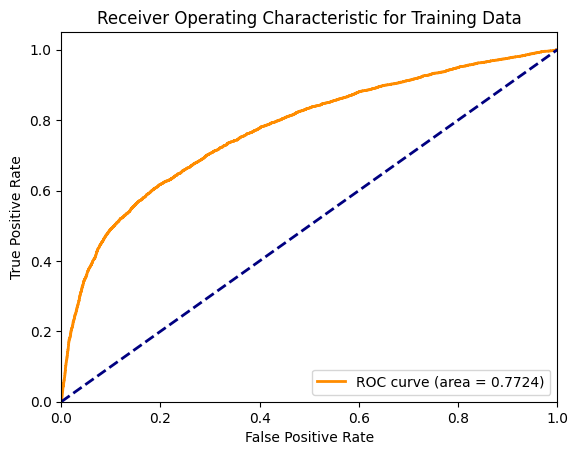

In [169]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, pprob)
roc_auc = roc_auc_score(y_train.cat.codes, pprob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()


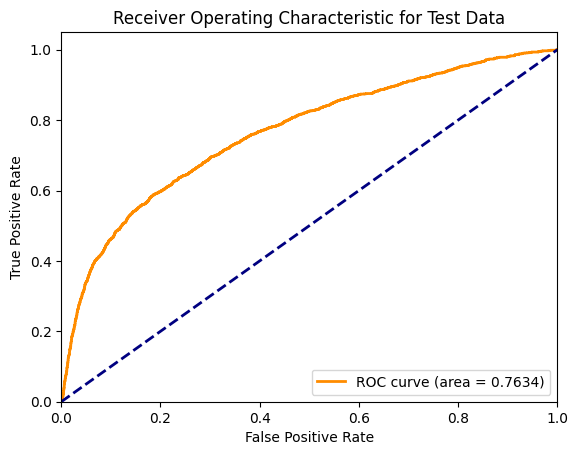

In [170]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, pprob_test)
roc_auc = roc_auc_score(y_test.cat.codes, pprob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

In [171]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, psuccess)
prec_train = precision_score(y_train, psuccess)
rec_train = recall_score(y_train, psuccess)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train))
print("Precision (Train): {:.4f}".format(prec_train))
print("Recall (Train)  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, psuccess_test)
prec_test = precision_score(y_test, psuccess_test)
rec_test = recall_score(y_test, psuccess_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test))
print("Precision (Test): {:.4f}".format(prec_test))
print("Recall (Test)  : {:.4f}".format(rec_test))
print("")

Accuracy (Train) : 0.8172
Precision (Train): 0.6864
Recall (Train)  : 0.3296

Accuracy (Test) : 0.8156
Precision (Test): 0.6656
Recall (Test)  : 0.3077



# Reduced Model - Stepwise


In [172]:
# Define the stepwise selection function
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out=0.05, 
                       verbose=True):
    included = list(initial_list)
    
    while True:
        changed = False

        # Forward Step: Evaluate adding variables
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_col in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_col]]))).fit(disp=False)
            new_pval[new_col] = model.pvalues[new_col]
        
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f"Add {best_feature} with p-value {best_pval:.6f}")

        # Backward Step: Evaluate removing variables
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=False)
        pvalues = model.pvalues.iloc[1:]  # Exclude the intercept ("const")
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f"Drop {worst_feature} with p-value {worst_pval:.6f}")

        if not changed:
            break
    
    return included

# Example Usage
# Ensure that X_train and y_train are preprocessed
selected_features = stepwise_selection(X, y)

# Print the selected features
print("Selected Features:", selected_features)


Add pay_2 with p-value 0.000000
Add const with p-value 0.000000
Add pay_1 with p-value 0.000000
Add limit_bal with p-value 0.000000
Add pay_6 with p-value 0.000000
Add bill_minus_pay5_partial payment with p-value 0.000000
Add pay_3 with p-value 0.000000
Add marriage_single with p-value 0.000000
Add bill_minus_pay1_partial payment with p-value 0.000002
Add education_high_school_grad with p-value 0.000016
Add pay_4 with p-value 0.000112
Add pay_amt2 with p-value 0.000253
Add bill_amt3 with p-value 0.000034
Add gender_male with p-value 0.000430
Add pay_amt1 with p-value 0.006162
Add age with p-value 0.027450
Selected Features: ['pay_2', 'const', 'pay_1', 'limit_bal', 'pay_6', 'bill_minus_pay5_partial payment', 'pay_3', 'marriage_single', 'bill_minus_pay1_partial payment', 'education_high_school_grad', 'pay_4', 'pay_amt2', 'bill_amt3', 'gender_male', 'pay_amt1', 'age']


In [173]:


# Split the data into training and testing sets
X2 = cc_df.drop(['default'], axis=1)

# Full model including only the selected features from stepwise regression
X2 = cc_df[['pay_1', 'pay_3', 'limit_bal', 'pay_6', 
            'pay_4', 'pay_amt2', 'bill_amt3', 'pay_2', 
            'pay_amt1', 'age', 'bill_minus_pay5', 'bill_minus_pay1', 
            'marriage', 'education', 'gender']]

# Create dummy variables only for the selected nominal inputs
X2 = pd.get_dummies(
    X2,
    columns=['bill_minus_pay5', 'bill_minus_pay1', 'marriage', 'education', 'gender'],
    drop_first=True,
    dtype='float'
)

# Keep only the selected features from stepwise regression
selected_features = [
    'pay_1', 'pay_3', 'limit_bal', 'bill_minus_pay5_partial payment', 'pay_6',
    'marriage_single', 'education_high_school_grad', 'bill_minus_pay1_partial payment',
    'pay_4', 'pay_amt2', 'bill_amt3', 'gender_male', 'pay_2', 'pay_amt1', 'age'
]
X2 = X2[selected_features]

# Define response variable
y2 = cc_df['default']

# Split into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Check structure of training and testing sets
X2_train.info()
y2_train.info()




<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 28465 to 23654
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pay_1                            21000 non-null  int64  
 1   pay_3                            21000 non-null  int64  
 2   limit_bal                        21000 non-null  int64  
 3   bill_minus_pay5_partial payment  21000 non-null  float64
 4   pay_6                            21000 non-null  int64  
 5   marriage_single                  21000 non-null  float64
 6   education_high_school_grad       21000 non-null  float64
 7   bill_minus_pay1_partial payment  21000 non-null  float64
 8   pay_4                            21000 non-null  int64  
 9   pay_amt2                         21000 non-null  int64  
 10  bill_amt3                        21000 non-null  int64  
 11  gender_male                      21000 non-null  float64
 12  pay_2              

In [174]:
# Fit reduced (stepwise) logistic regression model to examine the significance of the terms
X2 = X2_train
X2 = sm.add_constant(X2)  # Add constant for intercept
y2 = y2_train

# Fit the reduced logistic regression model
logit_step = sm.Logit(y2, X2).fit()

# Print summary of the logistic regression model
print(logit_step.summary())

Optimization terminated successfully.
         Current function value: 0.441474
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20984
Method:                           MLE   Df Model:                           15
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.1674
Time:                        09:49:53   Log-Likelihood:                -9271.0
converged:                       True   LL-Null:                       -11136.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.9548      0.118     -8.119  

In [175]:
# Generate predicted values for the training set
pprob2 = logit_step.predict(X2)

# Create predicted category for success using 50% cutoff
psuccess2 = (pprob2 > 0.5).astype(int)

# Add new variables to the training dataset
X2_train['p_success'] = psuccess2
X2_train['p_prob'] = pprob2
X2_train['y'] = y2_train

# Generate predicted values for the test set
X2_test = sm.add_constant(X2_test)  # Add constant for intercept

pprob2_test = logit_step.predict(X2_test)

# Create predicted category for success using 50% cutoff
psuccess2_test = (pprob2_test > 0.5).astype(int)

# Add new variables to the response dataset
X2_test['p_success'] = psuccess2_test
X2_test['p_prob'] = pprob2_test

X2_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 2308 to 26428
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   const                            9000 non-null   float64
 1   pay_1                            9000 non-null   int64  
 2   pay_3                            9000 non-null   int64  
 3   limit_bal                        9000 non-null   int64  
 4   bill_minus_pay5_partial payment  9000 non-null   float64
 5   pay_6                            9000 non-null   int64  
 6   marriage_single                  9000 non-null   float64
 7   education_high_school_grad       9000 non-null   float64
 8   bill_minus_pay1_partial payment  9000 non-null   float64
 9   pay_4                            9000 non-null   int64  
 10  pay_amt2                         9000 non-null   int64  
 11  bill_amt3                        9000 non-null   int64  
 12  gender_male          

In [176]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess2, y2_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess2_test, y2_test)
print(conf_matrix)

[[15624  3146]
 [  700  1530]]
[[6733 1353]
 [ 307  607]]


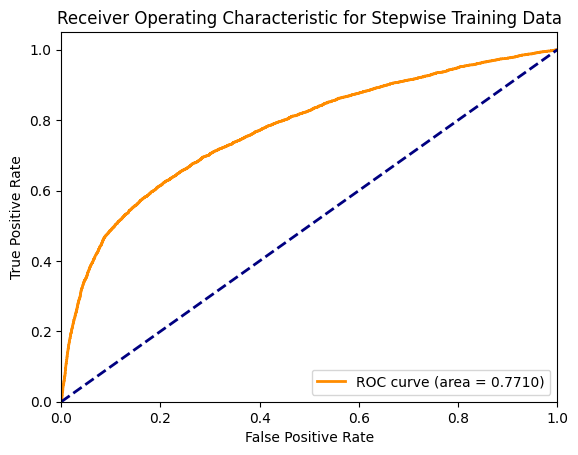

In [177]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y2_train.cat.codes, pprob2)
roc_auc = roc_auc_score(y2_train.cat.codes, pprob2)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Training Data')
plt.legend(loc='lower right')
plt.show()

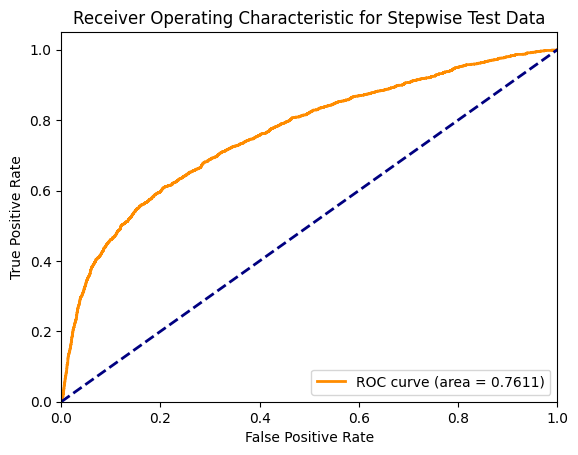

In [178]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y2_test.cat.codes, pprob2_test)
roc_auc = roc_auc_score(y2_test.cat.codes, pprob2_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Test Data')
plt.legend(loc='lower right')
plt.show()


In [179]:
# calculate the accuracy, precision, and recall scores
acc_train2 = accuracy_score(y2_train, psuccess2)
prec_train2 = precision_score(y2_train, psuccess2)
rec_train2 = recall_score(y2_train, psuccess2)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train2))
print("Precision (Train): {:.4f}".format(prec_train2))
print("Recall (Train)  : {:.4f}".format(rec_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc_test2 = accuracy_score(y2_test, psuccess2_test)
prec_test2 = precision_score(y2_test, psuccess2_test)
rec_test2 = recall_score(y2_test, psuccess2_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test2))
print("Precision (Test): {:.4f}".format(prec_test2))
print("Recall (Test)  : {:.4f}".format(rec_test2))
print("")


Accuracy (Train) : 0.8169
Precision (Train): 0.6861
Recall (Train)  : 0.3272

Accuracy (Test) : 0.8156
Precision (Test): 0.6641
Recall (Test)  : 0.3097



# SKLEARN - LASSO, L2, Elsatic Net

In [180]:
# split the data into training and testing sets
X3 = cc_df.drop(['default'], axis=1)
X3= cc_df[['limit_bal', 'gender', 'education', 'marriage', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 
           'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 
           'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'age_group',
           'bill_minus_pay1', 'bill_minus_pay2', 'bill_minus_pay3', 'bill_minus_pay4', 'bill_minus_pay5', 'bill_minus_pay6']]

X3 = pd.get_dummies(X3, columns=['gender', 'education', 'marriage','age_group', 'bill_minus_pay1', 'bill_minus_pay2', 'bill_minus_pay3', 'bill_minus_pay4', 'bill_minus_pay5', 'bill_minus_pay6'], drop_first=True,dtype='float')

y3 = cc_df['default']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()

y3_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 28465 to 23654
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   limit_bal                        21000 non-null  int64  
 1   age                              21000 non-null  int64  
 2   pay_1                            21000 non-null  int64  
 3   pay_2                            21000 non-null  int64  
 4   pay_3                            21000 non-null  int64  
 5   pay_4                            21000 non-null  int64  
 6   pay_5                            21000 non-null  int64  
 7   pay_6                            21000 non-null  int64  
 8   bill_amt1                        21000 non-null  int64  
 9   bill_amt2                        21000 non-null  int64  
 10  bill_amt3                        21000 non-null  int64  
 11  bill_amt4                        21000 non-null  int64  
 12  bill_amt5          

In [181]:
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)

# fit the models to the training data
lr_l1_1.fit(X3_train, y3_train)
lr_l1_01.fit(X3_train, y3_train)

# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# Create an instance of Logistic Regression for Elastic Net
lr_l12 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

# fit the models to the training data
lr_l2.fit(X3_train, y3_train)
lr_l12.fit(X3_train, y3_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [182]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X3.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients1 = rpt_model_variables(lr_l1_1)
df_coefficients01 = rpt_model_variables(lr_l1_01)
df_coefficients2 = rpt_model_variables(lr_l2)
df_coefficients12 = rpt_model_variables(lr_l12)

                            feature  coefficient  abs_coefficient
2                             pay_1       0.8434           0.8434
21       education_high_school_grad      -0.5884           0.5884
35  bill_minus_pay5_partial payment      -0.3359           0.3359
31  bill_minus_pay1_partial payment      -0.2305           0.2305
7                             pay_6       0.1858           0.1858
26                  marriage_single      -0.1561           0.1561
34  bill_minus_pay4_partial payment      -0.1414           0.1414
4                             pay_3       0.1382           0.1382
32  bill_minus_pay2_partial payment      -0.1090           0.1090
20                      gender_male       0.1085           0.1085
5                             pay_4       0.1012           0.1012
3                             pay_2       0.0917           0.0917
6                             pay_5       0.0708           0.0708
23       education_some_grad_school       0.0219           0.0219
27        

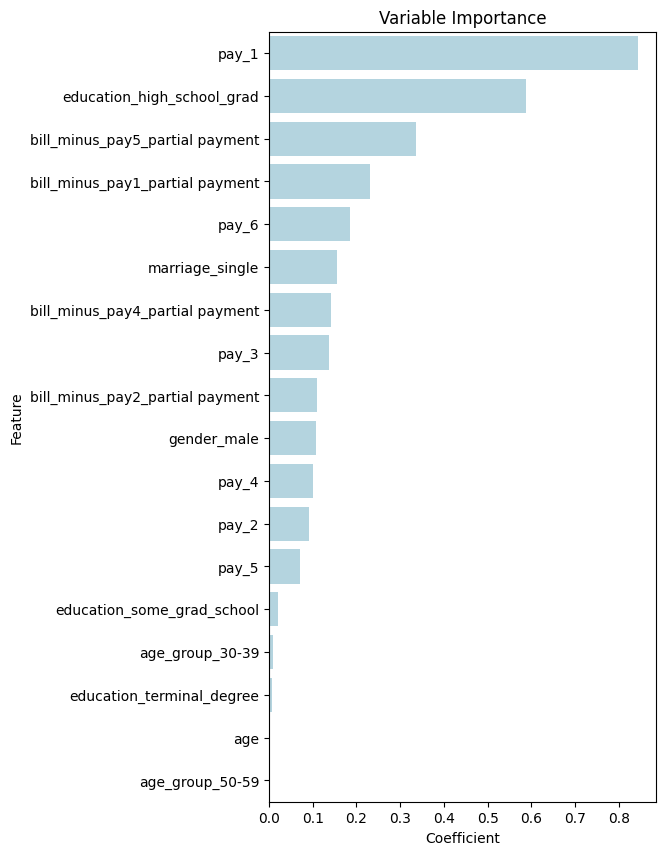

-- rejected --
 limit_bal
 bill_amt2
 bill_amt3
 pay_amt6
 pay_amt5
 pay_amt4
 pay_amt3
 pay_amt1
 pay_amt2
 bill_amt6
 bill_amt5
 bill_amt1
 bill_amt4
 education_some_college
 marriage_other
 age_group_40-49
 age_group_60+
 bill_minus_pay3_partial payment
 bill_minus_pay6_partial payment


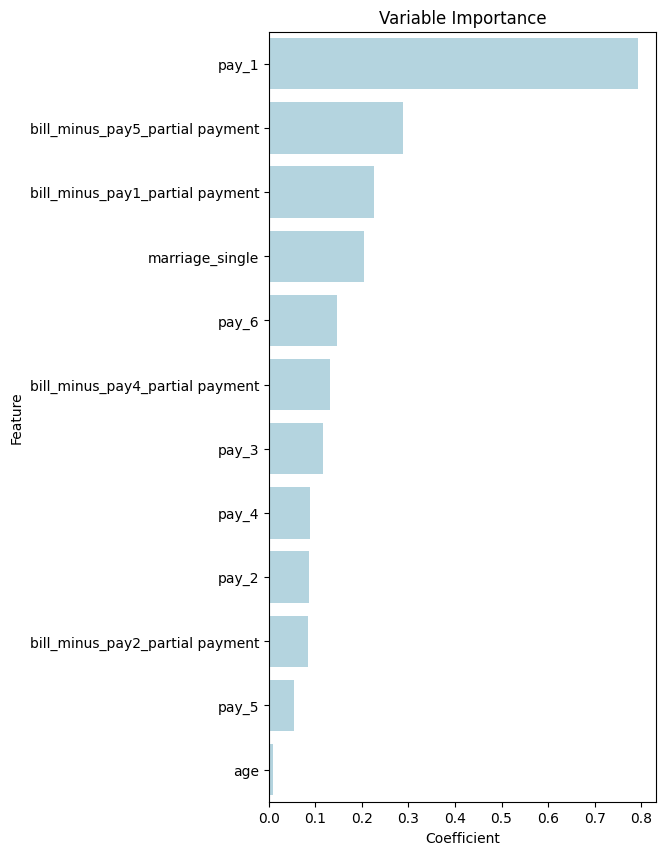

-- rejected --
 limit_bal
 bill_amt6
 pay_amt1
 pay_amt2
 bill_amt1
 bill_amt2
 bill_amt3
 bill_amt4
 bill_amt5
 gender_male
 pay_amt6
 pay_amt5
 pay_amt4
 pay_amt3
 education_high_school_grad
 education_some_grad_school
 education_some_college
 age_group_40-49
 age_group_30-39
 marriage_other
 education_terminal_degree
 age_group_50-59
 age_group_60+
 bill_minus_pay3_partial payment
 bill_minus_pay6_partial payment


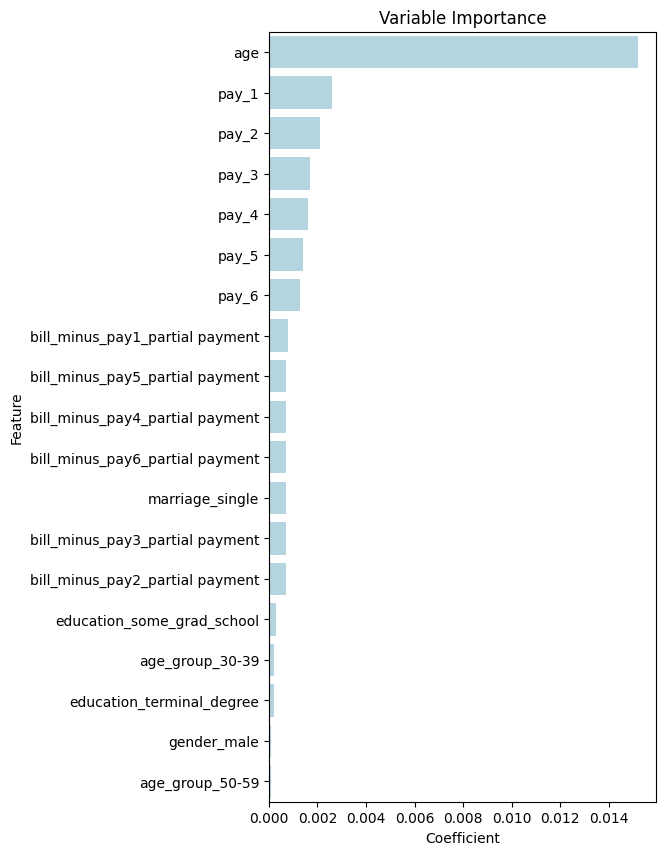

-- rejected --
 limit_bal
 bill_amt2
 pay_amt6
 pay_amt5
 pay_amt4
 pay_amt3
 pay_amt1
 pay_amt2
 bill_amt6
 bill_amt5
 bill_amt1
 bill_amt4
 bill_amt3
 education_high_school_grad
 age_group_40-49
 marriage_other
 education_some_college
 age_group_60+


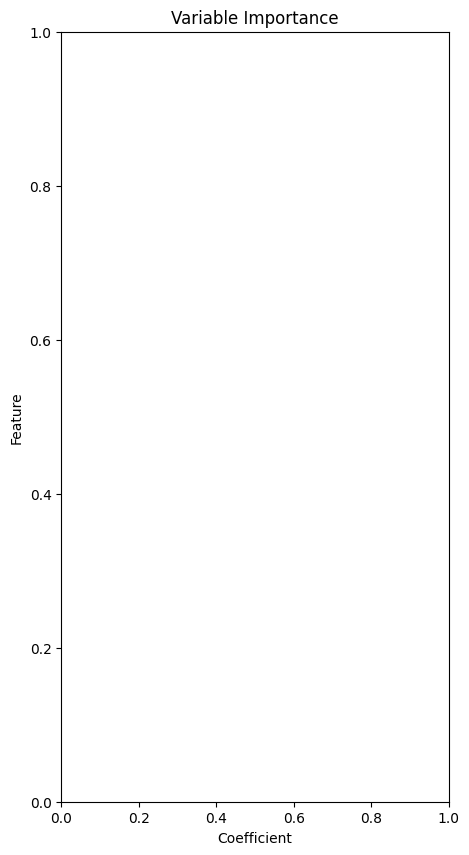

-- rejected --
 limit_bal
 age
 pay_1
 pay_2
 pay_3
 pay_4
 pay_5
 pay_6
 bill_amt1
 bill_amt2
 bill_amt3
 bill_amt4
 bill_amt5
 bill_amt6
 pay_amt1
 pay_amt2
 pay_amt3
 pay_amt4
 pay_amt5
 pay_amt6
 gender_male
 education_high_school_grad
 education_some_college
 education_some_grad_school
 education_terminal_degree
 marriage_other
 marriage_single
 age_group_30-39
 age_group_40-49
 age_group_50-59
 age_group_60+
 bill_minus_pay1_partial payment
 bill_minus_pay2_partial payment
 bill_minus_pay3_partial payment
 bill_minus_pay4_partial payment
 bill_minus_pay5_partial payment
 bill_minus_pay6_partial payment


In [183]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

plot_variable_imp(df_coefficients1)
plot_variable_imp(df_coefficients01)
plot_variable_imp(df_coefficients2)
plot_variable_imp(df_coefficients12)

In [184]:
# make predictions on the testing data
y_pred_train = lr_l1_1.predict(X3_train)
y_pred_test = lr_l1_1.predict(X3_test)
y_proba_train = lr_l1_1.predict_proba(X3_train)
y_proba_test = lr_l1_1.predict_proba(X3_test)

y_pred_train1 = lr_l1_01.predict(X3_train)
y_pred_test1 = lr_l1_01.predict(X3_test)
y_proba_train1 = lr_l1_01.predict_proba(X3_train)
y_proba_test1 = lr_l1_01.predict_proba(X3_test)

y_pred_train2 = lr_l2.predict(X3_train)
y_pred_test2 = lr_l2.predict(X3_test)
y_proba_train2 = lr_l2.predict_proba(X3_train)
y_proba_test2 = lr_l2.predict_proba(X3_test)

y_pred_train12 = lr_l12.predict(X3_train)
y_pred_test12 = lr_l12.predict(X3_test)
y_proba_train12 = lr_l12.predict_proba(X3_train)
y_proba_test12 = lr_l12.predict_proba(X3_test)


In [185]:
# calculate the accuracy, precision, and recall scores
acc3_train = accuracy_score(y3_train, y_pred_train)
prec3_train = precision_score(y3_train, y_pred_train)
rec3_train = recall_score(y3_train, y_pred_train)
auc3_train = roc_auc_score(y3_train, y_proba_train[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall.  : {:.4f}".format(rec3_train))
print("AUC      : {:.4f}".format(auc3_train))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test = accuracy_score(y3_test, y_pred_test)
prec3_test = precision_score(y3_test, y_pred_test)
rec3_test = recall_score(y3_test, y_pred_test)
auc3_test = roc_auc_score(y3_test, y_proba_test[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall.  : {:.4f}".format(rec3_test))
print("AUC      : {:.4f}".format(auc3_test))

 -- train set -- 
Accuracy : 0.8170
Precision: 0.6887
Recall.  : 0.3255
AUC      : 0.7721

 -- test set -- 
Accuracy : 0.8150
Precision: 0.6644
Recall.  : 0.3041
AUC      : 0.7629


In [186]:
# calculate the accuracy, precision, and recall scores
acc3_train1 = accuracy_score(y3_train, y_pred_train1)
prec3_train1 = precision_score(y3_train, y_pred_train1)
rec3_train1 = recall_score(y3_train, y_pred_train1)
auc3_train1 = roc_auc_score(y3_train, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train1))
print("Precision: {:.4f}".format(prec3_train1))
print("Recall.  : {:.4f}".format(rec3_train1))
print("AUC      : {:.4f}".format(auc3_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test1 = accuracy_score(y3_test, y_pred_test1)
prec3_test1 = precision_score(y3_test, y_pred_test1)
rec3_test1 = recall_score(y3_test, y_pred_test1)
auc3_test1 = roc_auc_score(y3_test, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test1))
print("Precision: {:.4f}".format(prec3_test1))
print("Recall.  : {:.4f}".format(rec3_test1))
print("AUC      : {:.4f}".format(auc3_test1))

 -- train set -- 
Accuracy : 0.8169
Precision: 0.6916
Recall.  : 0.3204
AUC      : 0.7669

 -- test set -- 
Accuracy : 0.8161
Precision: 0.6723
Recall.  : 0.3036
AUC      : 0.7590


In [187]:
# calculate the accuracy, precision, and recall scores
acc3_train2 = accuracy_score(y3_train, y_pred_train2)
prec3_train2 = precision_score(y3_train, y_pred_train2)
rec3_train2 = recall_score(y3_train, y_pred_train2)
auc3_train2 = roc_auc_score(y3_train, y_proba_train2[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train2))
print("Precision: {:.4f}".format(prec3_train2))
print("Recall.  : {:.4f}".format(rec3_train2))
print("AUC      : {:.4f}".format(auc3_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test2 = accuracy_score(y3_test, y_pred_test2)
prec3_test2 = precision_score(y3_test, y_pred_test2)
rec3_test2 = recall_score(y3_test, y_pred_test2)
auc3_test2 = roc_auc_score(y3_test, y_proba_test2[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test2))
print("Precision: {:.4f}".format(prec3_test2))
print("Recall.  : {:.4f}".format(rec3_test2))
print("AUC      : {:.4f}".format(auc3_test2))

 -- train set -- 
Accuracy : 0.7772
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6464

 -- test set -- 
Accuracy : 0.7822
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6480


In [188]:
# calculate the accuracy, precision, and recall scores
acc3_train12 = accuracy_score(y3_train, y_pred_train12)
prec3_train12 = precision_score(y3_train, y_pred_train12)
rec3_train12 = recall_score(y3_train, y_pred_train12)
auc3_train12 = roc_auc_score(y3_train, y_proba_train12[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train12))
print("Precision: {:.4f}".format(prec3_train12))
print("Recall.  : {:.4f}".format(rec3_train12))
print("AUC      : {:.4f}".format(auc3_train12))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test12 = accuracy_score(y3_test, y_pred_test12)
prec3_test12 = precision_score(y3_test, y_pred_test12)
rec3_test12 = recall_score(y3_test, y_pred_test12)
auc3_test12 = roc_auc_score(y3_test, y_proba_test12[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test12))
print("Precision: {:.4f}".format(prec3_test12))
print("Recall.  : {:.4f}".format(rec3_test12))
print("AUC      : {:.4f}".format(auc3_test12))

 -- train set -- 
Accuracy : 0.7772
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6531

 -- test set -- 
Accuracy : 0.7822
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6517


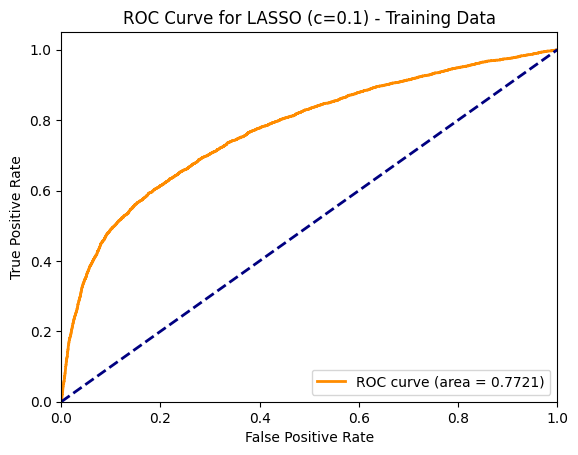

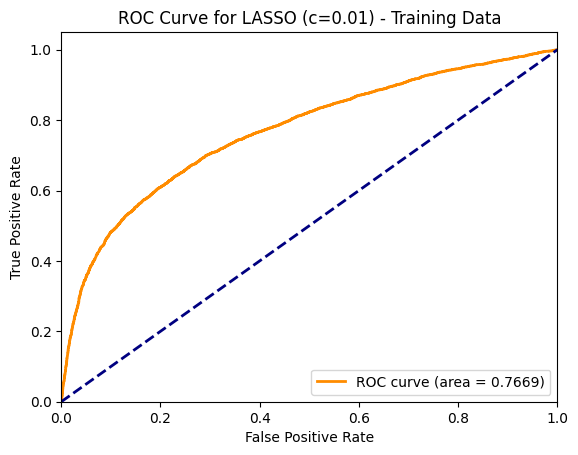

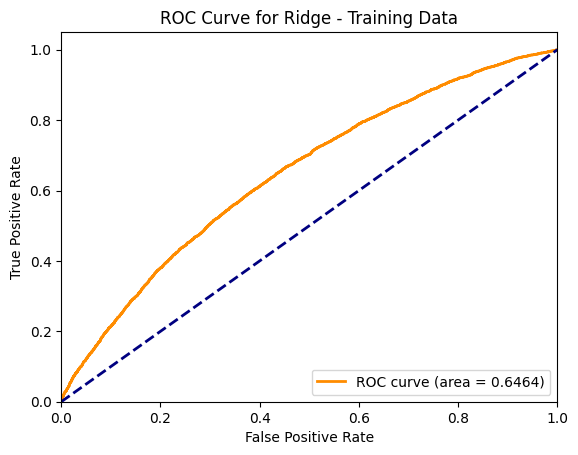

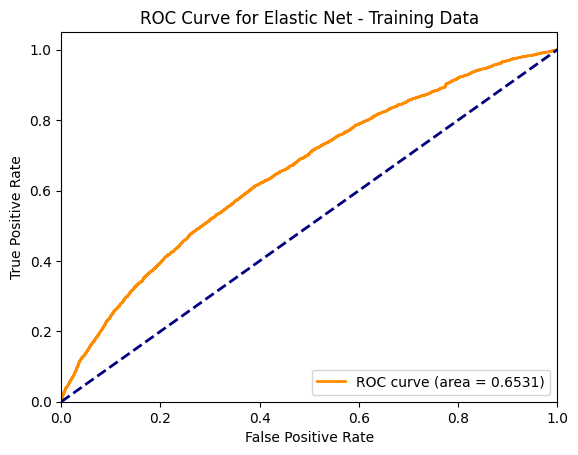

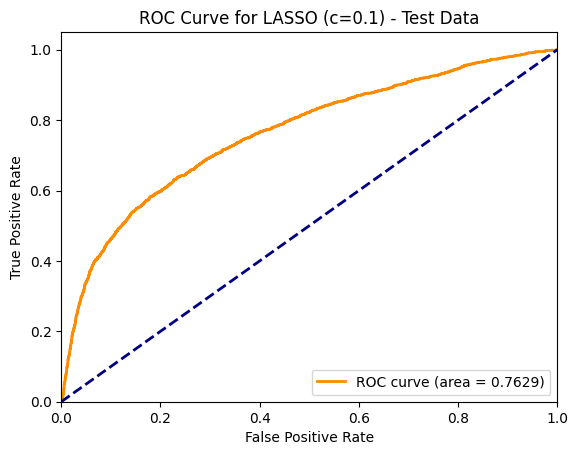

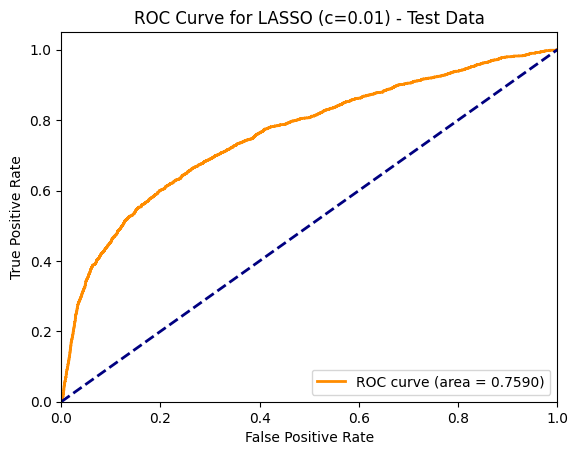

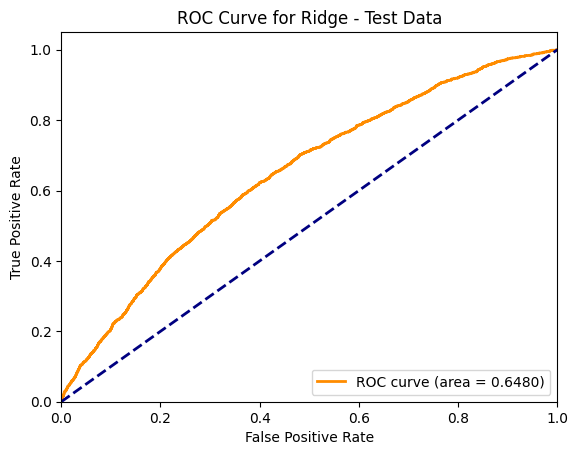

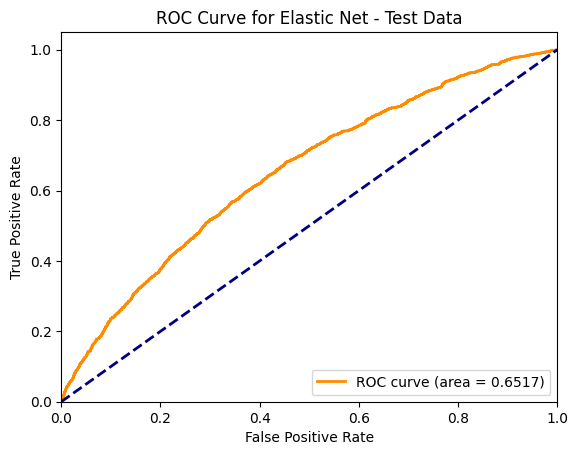

In [189]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = roc_auc_score(y_true, y_proba)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curves for training data
plot_roc_curve(y3_train, y_proba_train[:, 1], "ROC Curve for LASSO (c=0.1) - Training Data")
plot_roc_curve(y3_train, y_proba_train1[:, 1], "ROC Curve for LASSO (c=0.01) - Training Data")
plot_roc_curve(y3_train, y_proba_train2[:, 1], "ROC Curve for Ridge - Training Data")
plot_roc_curve(y3_train, y_proba_train12[:, 1], "ROC Curve for Elastic Net - Training Data")

# Plot ROC curves for test data
plot_roc_curve(y3_test, y_proba_test[:, 1], "ROC Curve for LASSO (c=0.1) - Test Data")
plot_roc_curve(y3_test, y_proba_test1[:, 1], "ROC Curve for LASSO (c=0.01) - Test Data")
plot_roc_curve(y3_test, y_proba_test2[:, 1], "ROC Curve for Ridge - Test Data")
plot_roc_curve(y3_test, y_proba_test12[:, 1], "ROC Curve for Elastic Net - Test Data")